___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Flask API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (flask api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Flask API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [5]:
df.duplicated().sum()

1081

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

### Exploratory Data Analysis

### Data Cleaning
Check Missing Values and Outliers

In [9]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [10]:
from scipy.stats import zscore
from scipy import stats
from numpy import percentile

In [11]:
def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.05, print_list = False):
    '''This function detects the best z-score for outlier detection in the specified column.'''
    z_scores = stats.zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
    df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
    df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    df_outlier['pct'] = df_outlier['pct'].apply(lambda x : x-100 if x == 100 else x)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    IQR_coef = round((best_treshold - 0.675) / 1.35, 2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    num_outlier = df_outlier.iloc[df_outlier.pct.argmax(), 1]
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), colors="r", ls = ":")
    plt.annotate("Zscore : {}\nIQR_coef : {}\nValue : {}\nNum_outlier : {}\nPercentile : {}".format(best_treshold,
                                                                          IQR_coef,
                                                                          outlier_limit,
                                                                          num_outlier,
                                                                          (np.round(percentile_threshold, 3),
                                                                           np.round(100-percentile_threshold, 3))),
                                                                          (best_treshold, df_outlier.outlier_count.max()/2))
    plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, IQR_coef, outlier_limit, num_outlier, percentile_threshold)

In [12]:
def outlier_inspect(df, col, min_z = 1, max_z = 5, step = 0.05, max_hist = None, bins = 50):
    '''This function plots histogram, boxplot and z-score/outlier graphs for the specified column.'''
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.histplot(x=df[col], kde=False, bins = 50)
    else :
        sns.histplot(x=df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(x=df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z = min_z, max_z = max_z, step = step)
    plt.show()

In [13]:
def num_outliers(df, col, whis = 1.5):
    """This function gives max/min threshold, number of data, number of outlier and plots its boxplot,
    according to the tree type and the entered z-score value for the relevant column."""
    q1 = df.groupby("Cover_Type")[col].quantile(0.25)
    q3 = df.groupby("Cover_Type")[col].quantile(0.75)
    iqr = q3 - q1
    print("Column_name :", col)
    print("whis :", whis)
    print("-------------------------------------------")
    for i in np.sort(df.Cover_Type.unique()):
        min_threshold = q1.loc[i] - whis*iqr.loc[i]
        max_threshold = q3.loc[i] + whis*iqr.loc[i]
        print("min_threshold:", min_threshold, "\nmax_threshold:", max_threshold)
        num_outliers = len(df[df["Cover_Type"]==i][col][(df[col]<min_threshold) | (df[col]>max_threshold)])
        print(f"Num_of_values for {i} :", len(df[df["Cover_Type"]==i]))
        print(f"Num_of_outliers for {i} :", num_outliers)
        print("-------------------------------------------")
    return sns.boxplot(y = df[col], x = df["Cover_Type"], whis=whis)

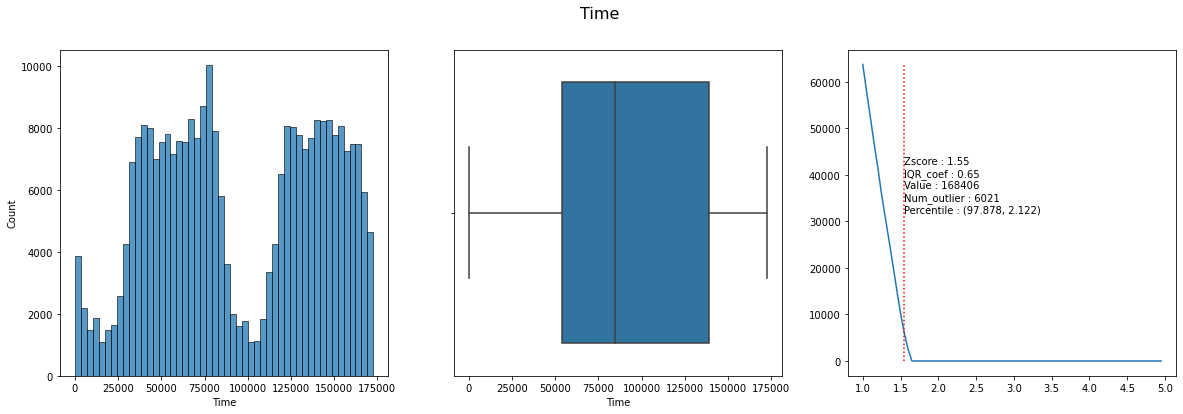

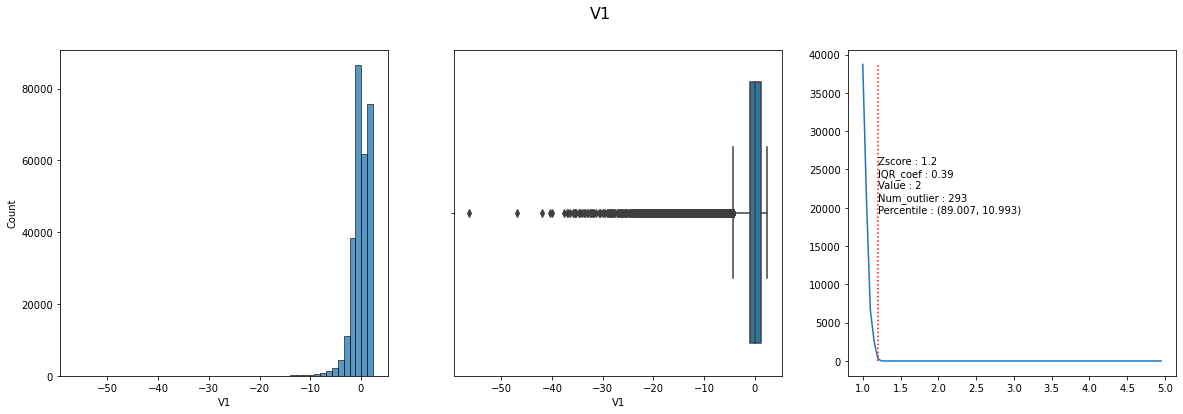

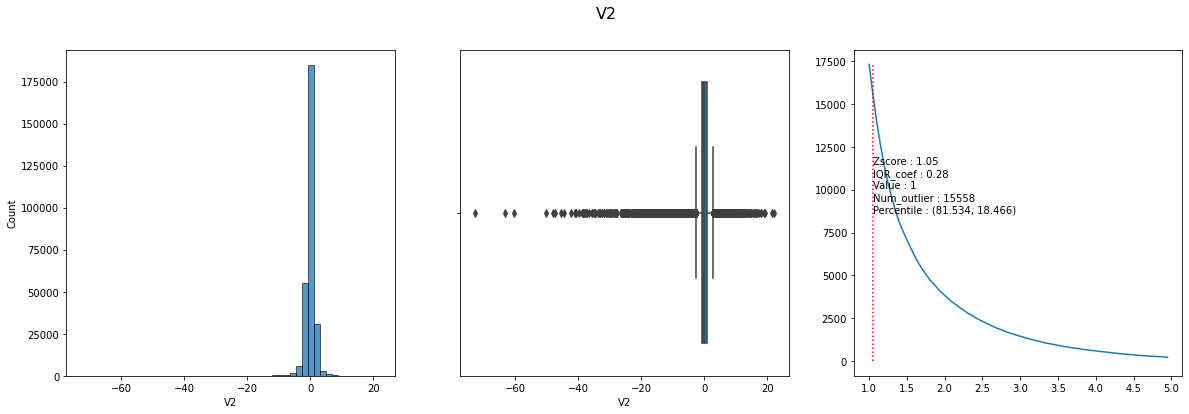

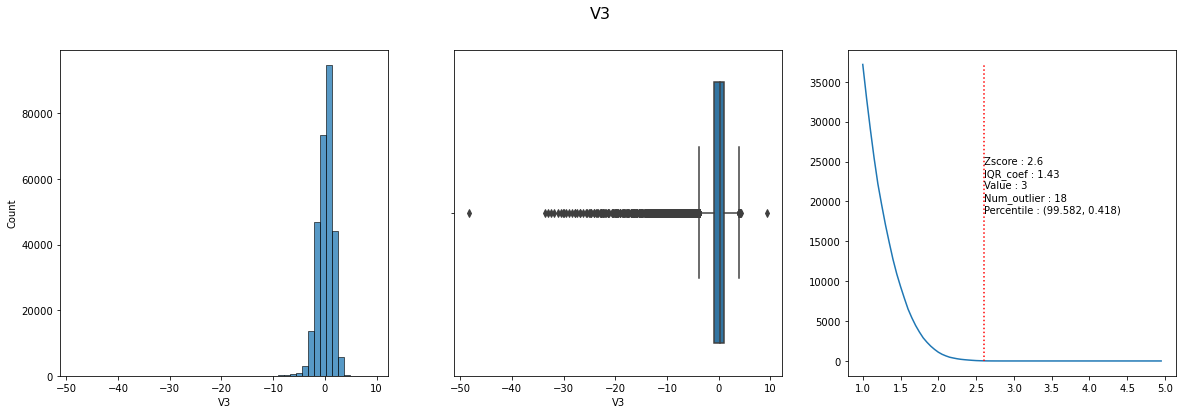

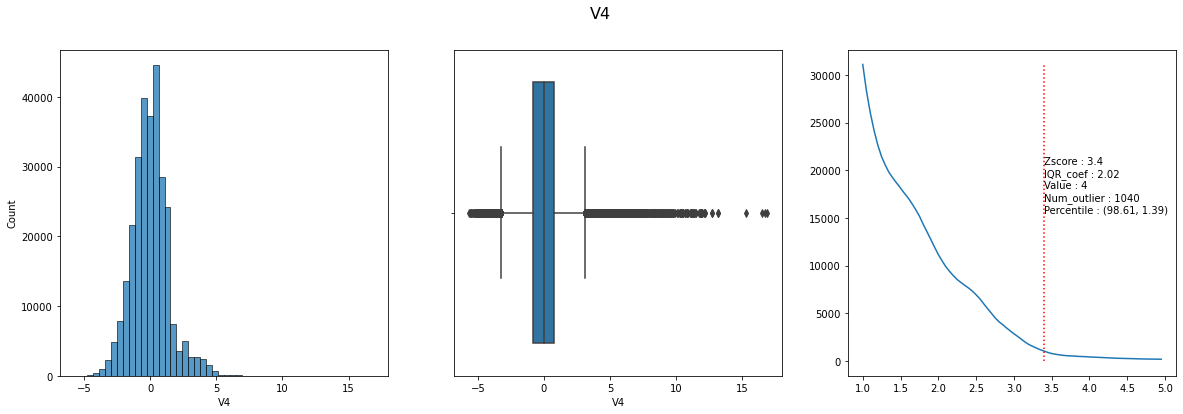

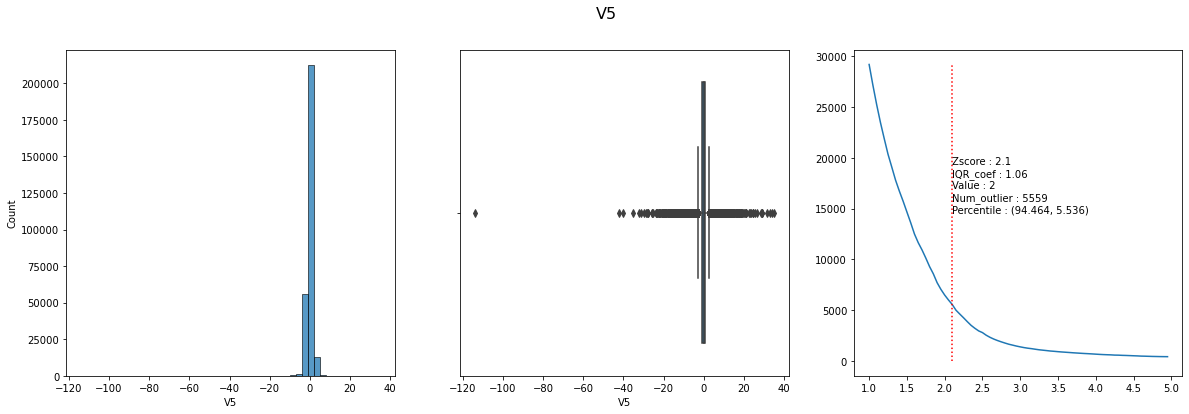

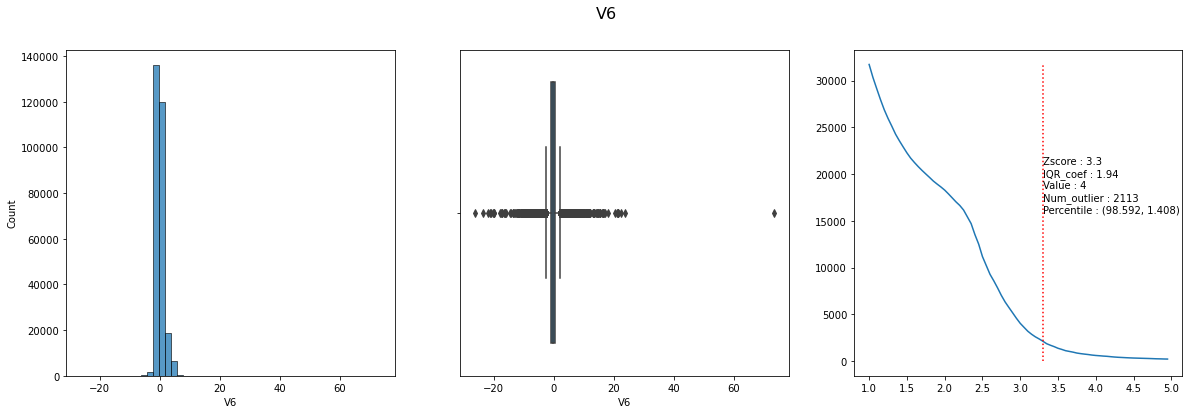

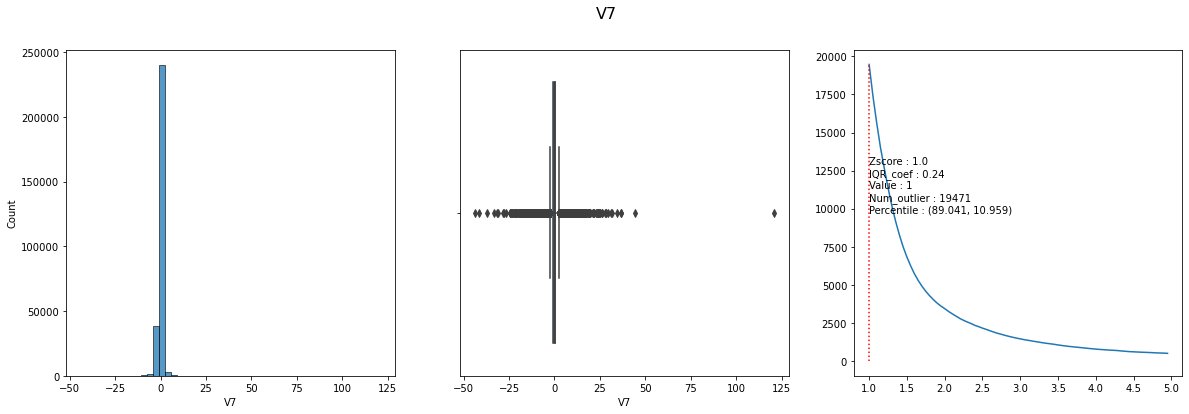

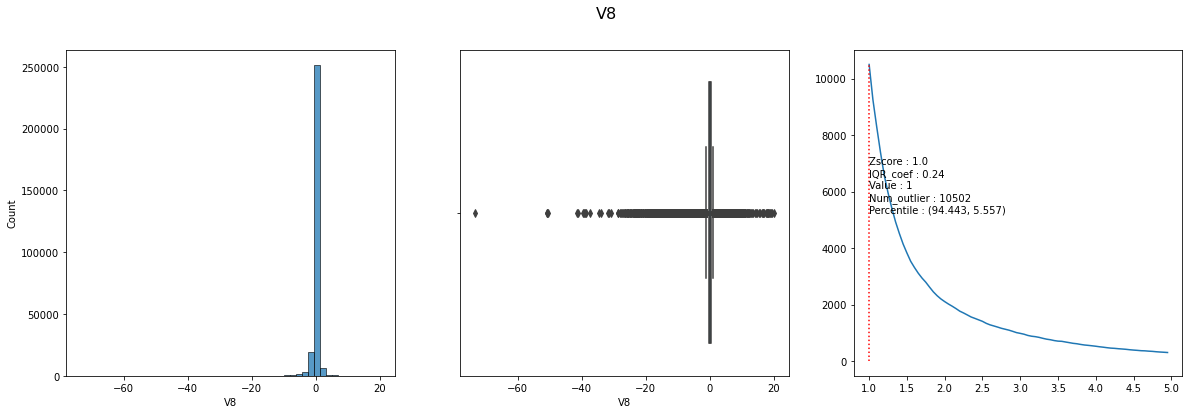

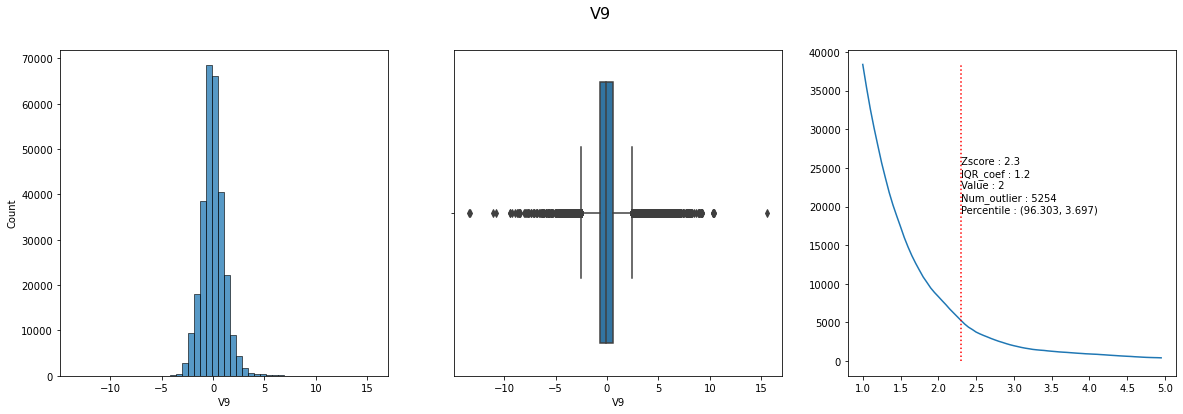

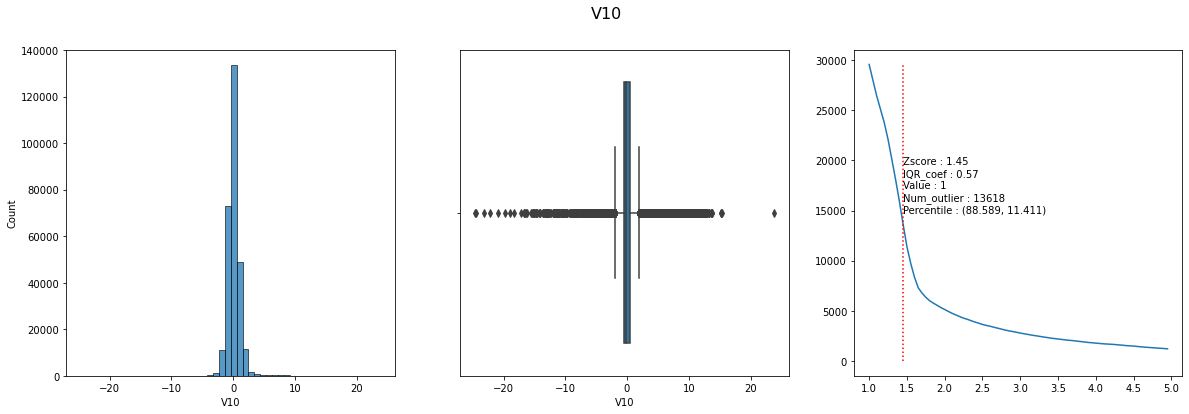

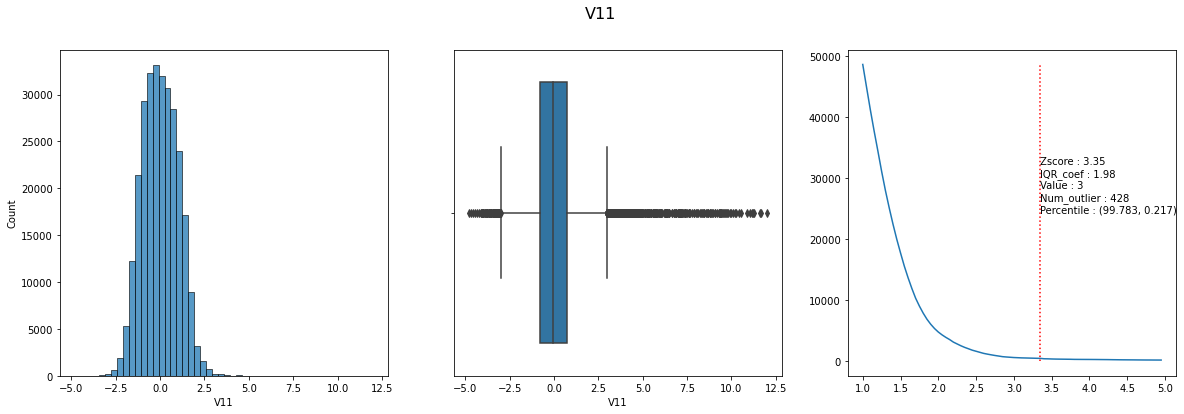

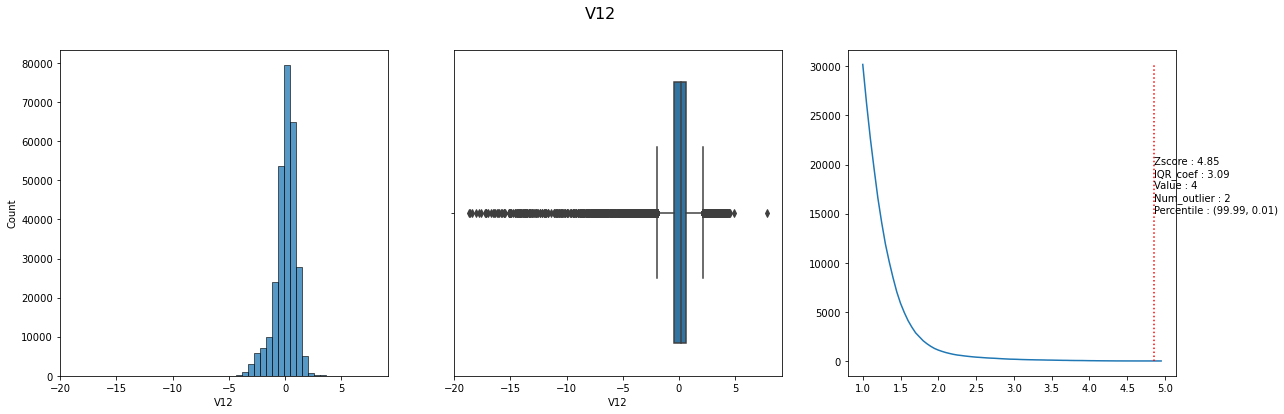

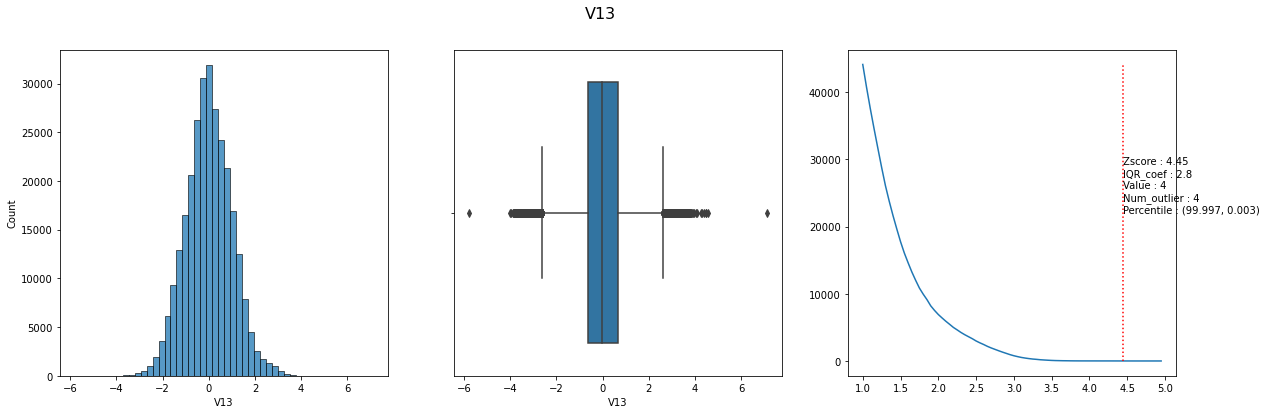

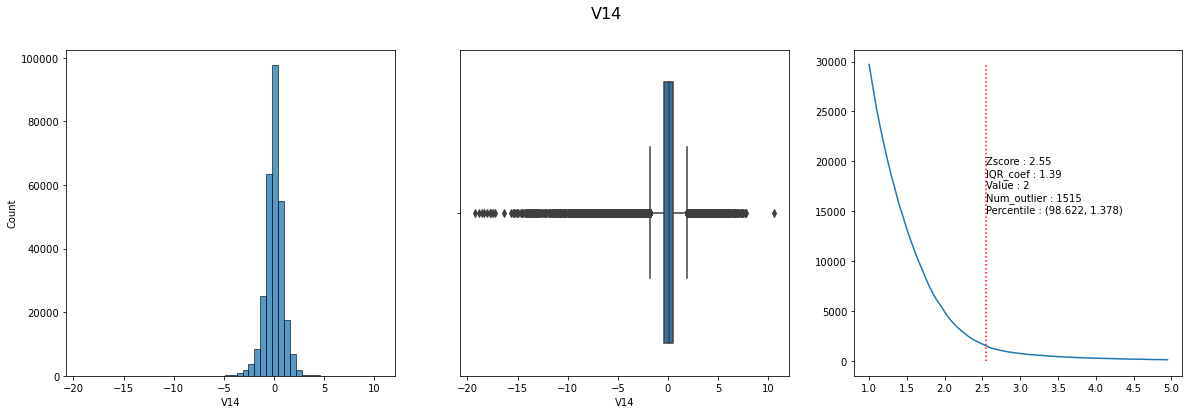

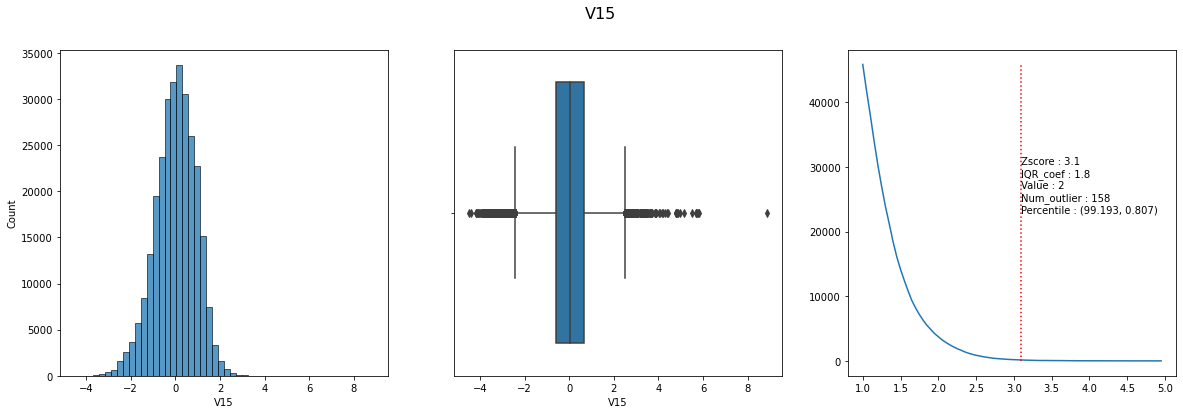

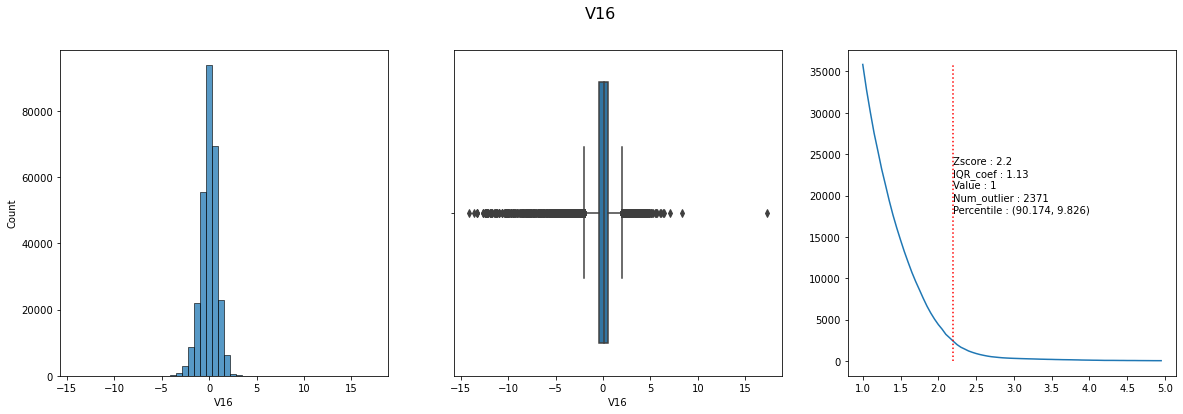

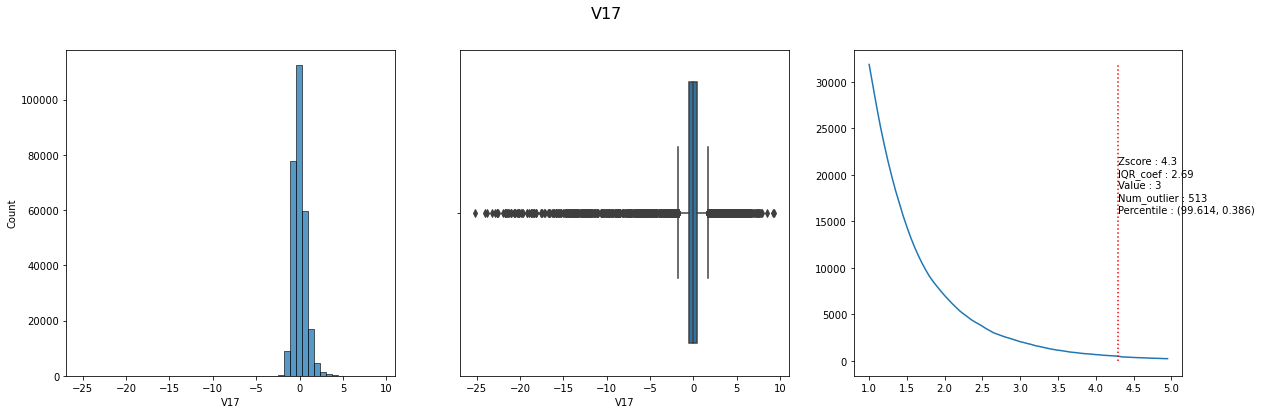

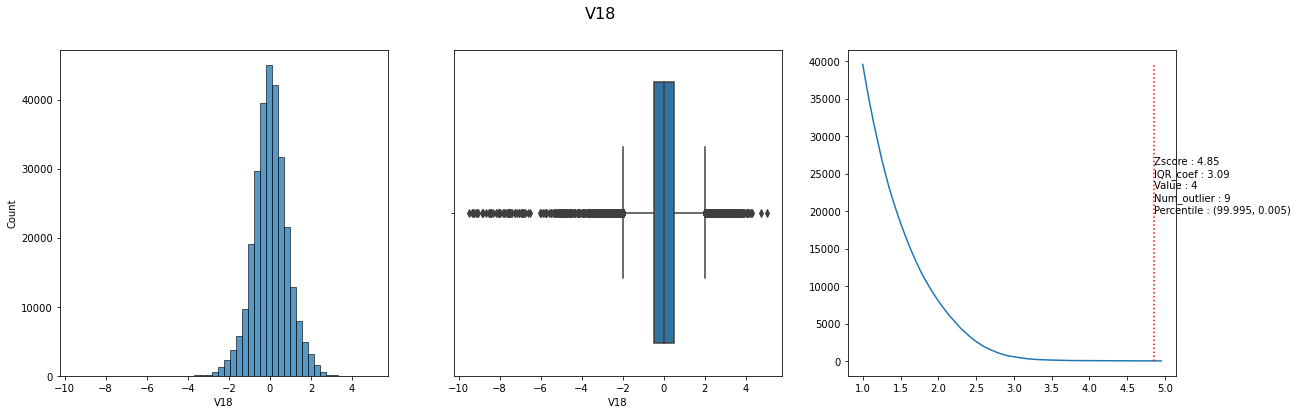

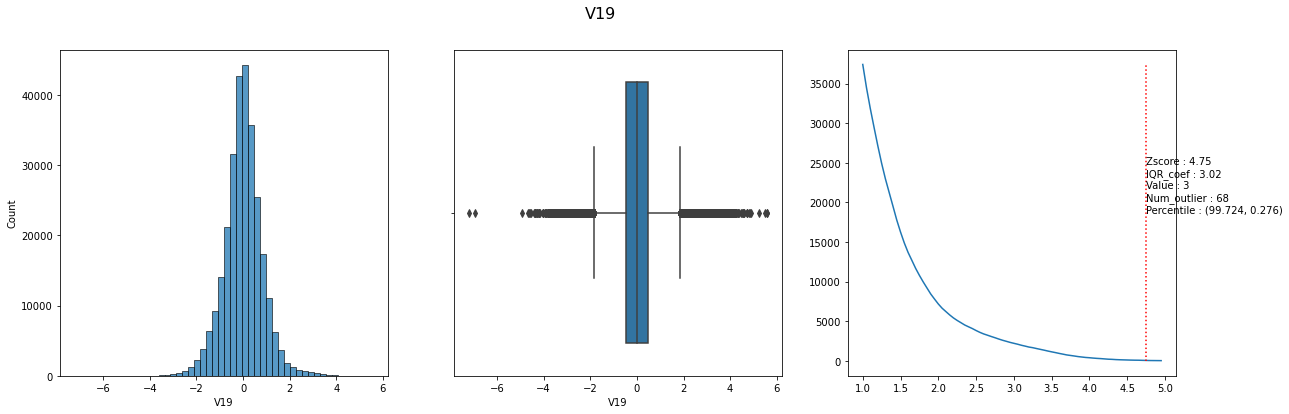

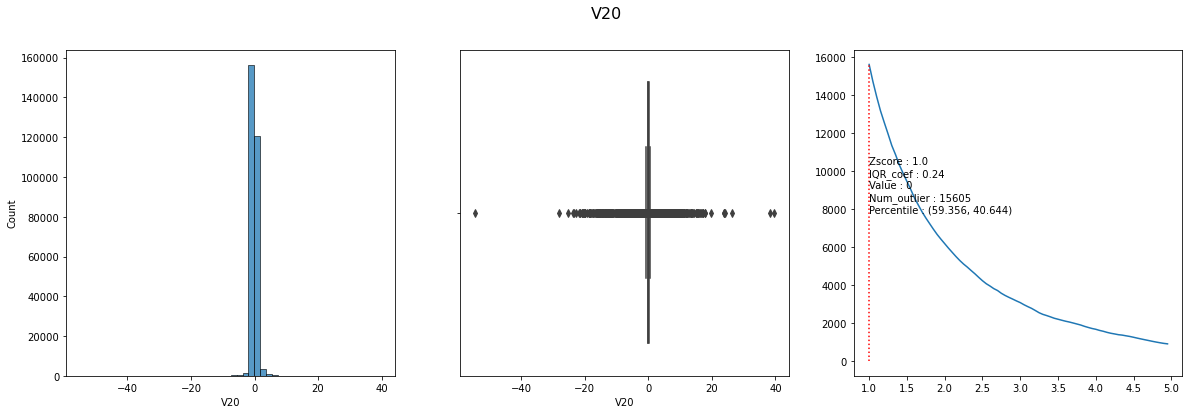

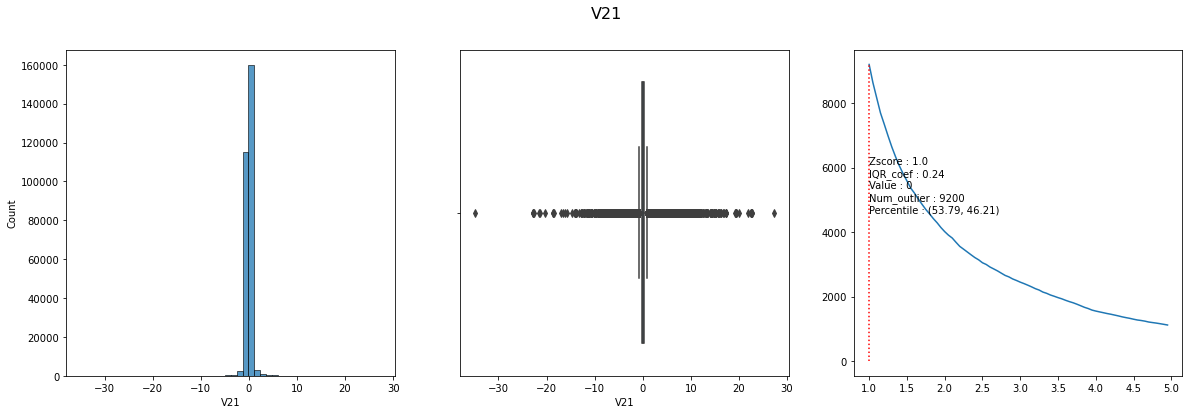

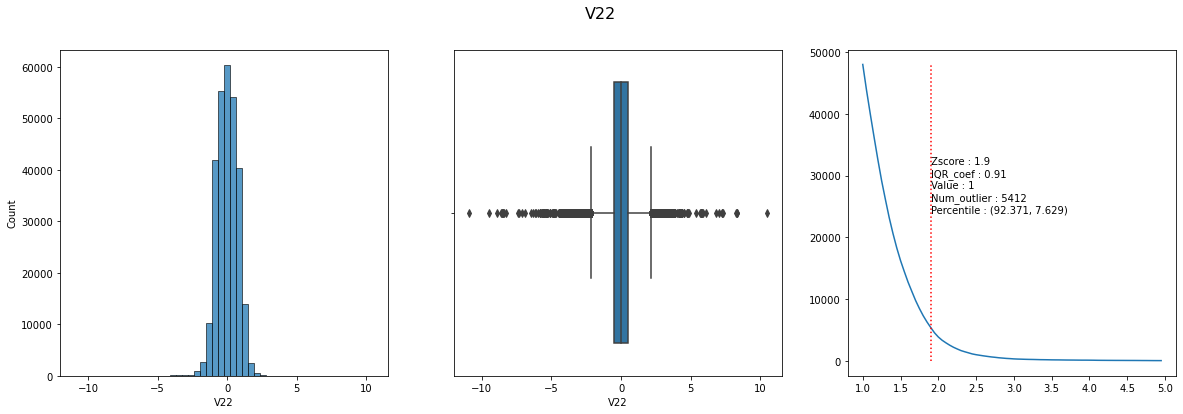

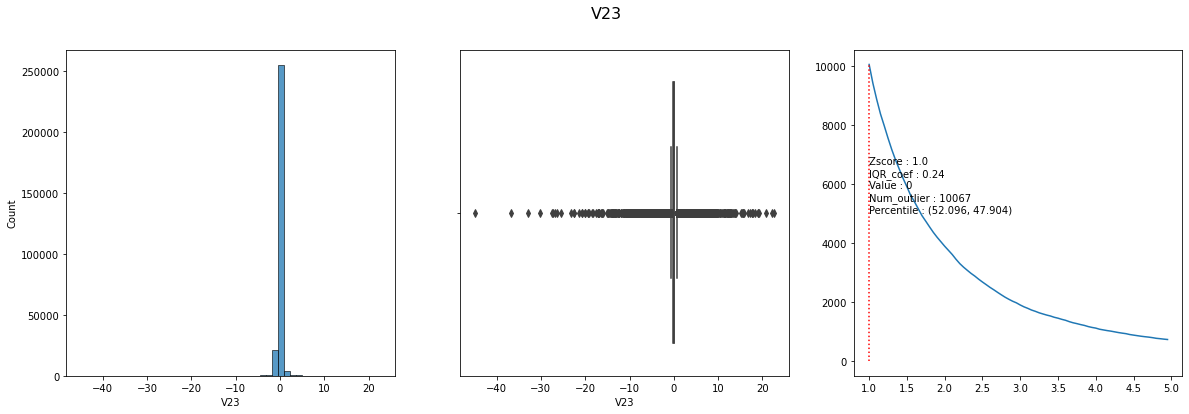

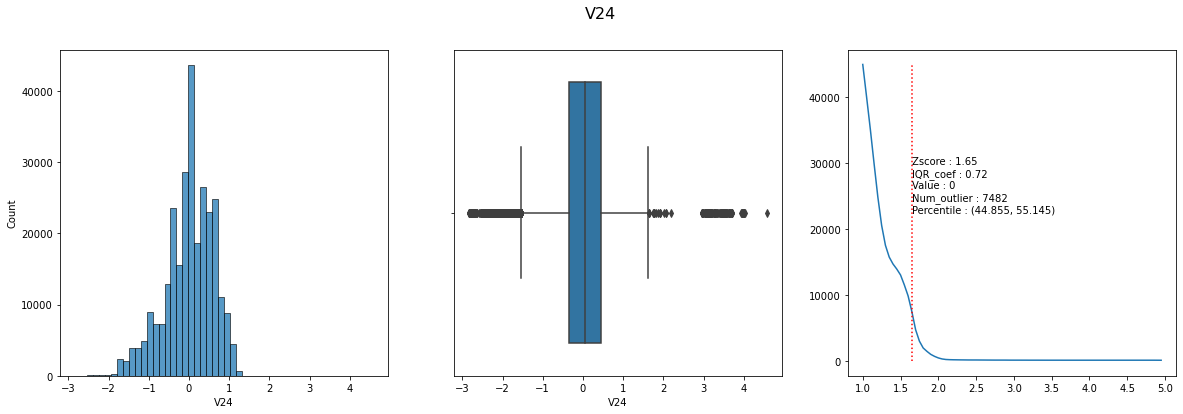

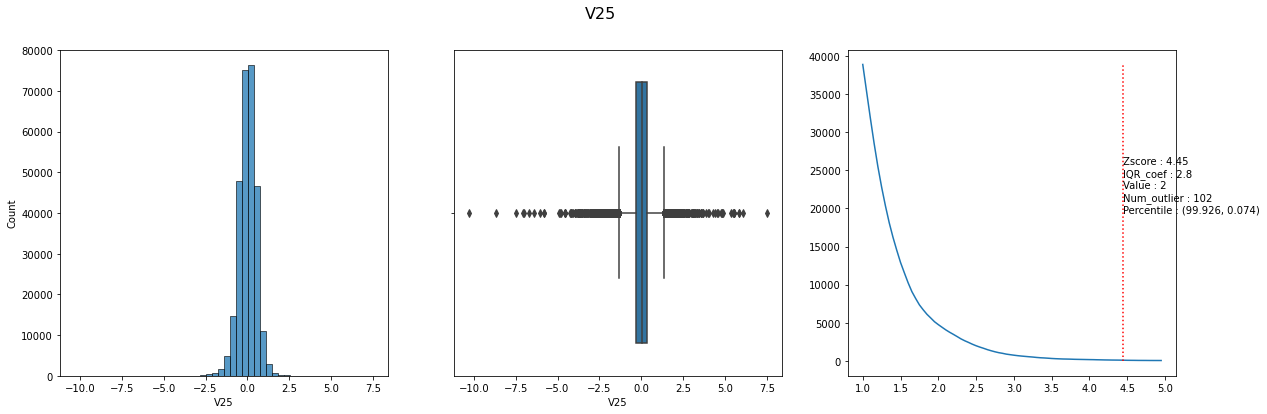

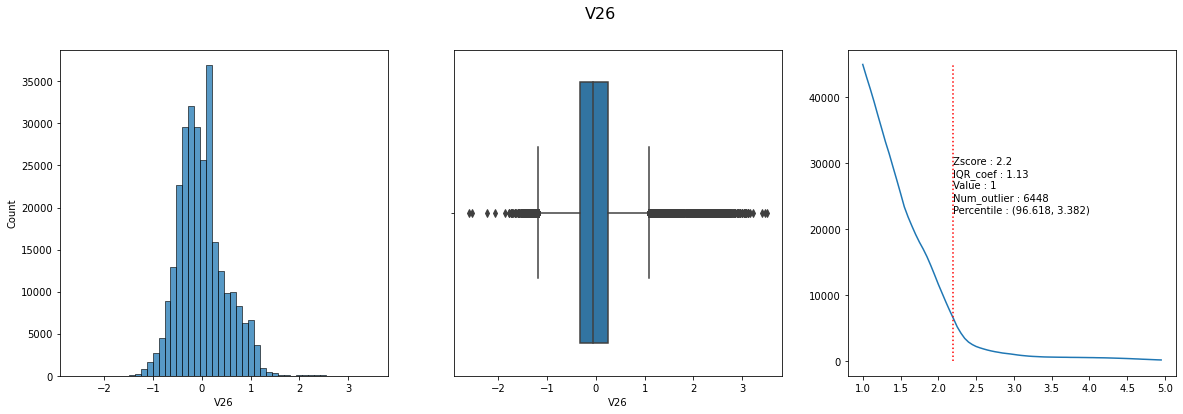

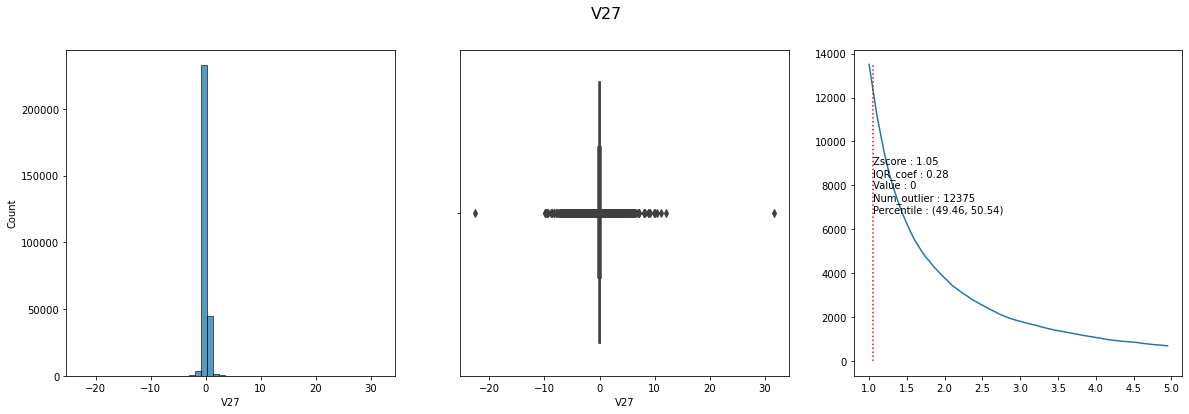

In [14]:
for col in df.columns[:28]:
    outlier_inspect(df, col)

In [15]:
# Investigating if time matters for frauds

In [16]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
df['hours']=np.mod(((df.Time//3600)),24)

In [18]:
df['hours'].sample(10)

126033    21.0
183994    11.0
131113    22.0
8724       3.0
268888    21.0
267033    21.0
167978     9.0
221112    15.0
25674      9.0
35484     10.0
Name: hours, dtype: float64

In [19]:
(df.groupby('hours').sum().Class/df.hours.value_counts())*1000

0.0      0.784621
1.0      2.376426
2.0     14.510278
3.0      4.875251
4.0     10.435572
5.0      3.681392
6.0      2.204802
7.0      3.179870
8.0      0.879593
9.0      1.014778
10.0     0.483442
11.0     3.158334
12.0     1.105475
13.0     1.109443
14.0     1.392252
15.0     1.587883
16.0     1.341791
17.0     1.735896
18.0     1.651041
19.0     1.220609
20.0     1.077522
21.0     0.907595
22.0     0.585252
23.0     1.562069
dtype: float64

In [20]:
df.hours = df.hours.astype(str)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [22]:
# Checking outliers

In [23]:
df.reset_index(inplace=True, drop=True)

In [24]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hours
283721,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23.0
283722,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23.0
283723,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23.0
283724,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23.0
283725,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,23.0


In [25]:
df.V7.sort_values(ascending=False)

273745    120.589494
283168     44.054461
219306     36.877368
23040      36.677268
1621       34.303177
             ...    
65163     -31.764946
153640    -33.239328
153777    -37.060311
153993    -41.506796
154090    -43.557242
Name: V7, Length: 283726, dtype: float64

In [26]:
df.iloc[[273745]]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hours
273745,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.34736,-3.872425,...,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0,22.0


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


In [28]:
df.sample(6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hours
181546,125309.0,-4.172199,-0.592442,-1.493699,-0.463297,-0.591837,-0.671612,1.398478,0.580846,-0.791083,...,-0.678934,-0.247641,0.743428,0.838754,-0.096288,-0.583765,-0.382122,244.42,0,10.0
240592,151044.0,2.086353,0.227400,-1.747530,0.371206,0.582186,-0.767479,0.251620,-0.284484,0.350490,...,-0.890155,0.308070,0.406810,-0.202872,0.177912,-0.056286,-0.029812,1.98,0,17.0
230004,146508.0,-0.441592,0.715853,-1.136829,0.345085,0.322613,-1.136857,0.918132,-0.191282,-2.062974,...,0.517663,0.274528,-0.101004,-0.859849,-0.535110,-0.005342,0.189589,53.82,0,16.0
66921,52404.0,1.000444,-0.104644,1.782474,2.989735,-1.070416,0.786761,-0.835547,0.469913,0.595973,...,-0.406454,0.050978,0.516625,0.316880,-0.087055,0.048412,0.024438,15.17,0,14.0
66693,52298.0,1.318256,-0.931846,1.180751,-0.333078,-1.871208,-0.428447,-1.225269,0.141701,0.257855,...,-0.878553,0.164914,0.361788,-0.059956,0.966398,-0.018525,0.018058,9.95,0,14.0
136048,81759.0,-2.719390,-2.646198,1.917540,-0.740002,0.140664,-0.751428,-1.716089,0.864723,-0.260219,...,0.865426,-0.120048,0.161862,0.281261,-0.145971,0.023806,-0.328578,89.02,0,22.0


In [29]:
df.drop('Time', inplace = True, axis = 1)

In [30]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hours
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0


In [31]:
df1 = df.copy()
df1.drop('hours', inplace = True, axis = 1)

In [32]:
df = pd.get_dummies(df, columns=['hours'], drop_first=True)

In [33]:
df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,hours_21.0,hours_22.0,hours_23.0,hours_3.0,hours_4.0,hours_5.0,hours_6.0,hours_7.0,hours_8.0,hours_9.0
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0,0,0,0,0,0,0,0,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,hours_21.0,hours_22.0,hours_23.0,hours_3.0,hours_4.0,hours_5.0,hours_6.0,hours_7.0,hours_8.0,hours_9.0
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0,0,0,0,0,0,0,0,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0,0,0,0,0,0,0,0,0,0


## 2. Data Preprocessing

#### Scaling

In [35]:
X = df1.drop('Class', axis = 1)
y = df1.Class

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y ,random_state=101)

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log_model=LogisticRegression()

***ii. Model Training***

In [43]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

***iii. Prediction and Model Evaluating***

In [44]:
y_pred=log_model.predict(X_test_scaled)

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [46]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [47]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[84965    11]
 [   77    65]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.86      0.46      0.60       142

    accuracy                           1.00     85118
   macro avg       0.93      0.73      0.80     85118
weighted avg       1.00      1.00      1.00     85118


Train_Set
[[198250     27]
 [   156    175]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198277
           1       0.87      0.53      0.66       331

    accuracy                           1.00    198608
   macro avg       0.93      0.76      0.83    198608
weighted avg       1.00      1.00      1.00    198608



In [48]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

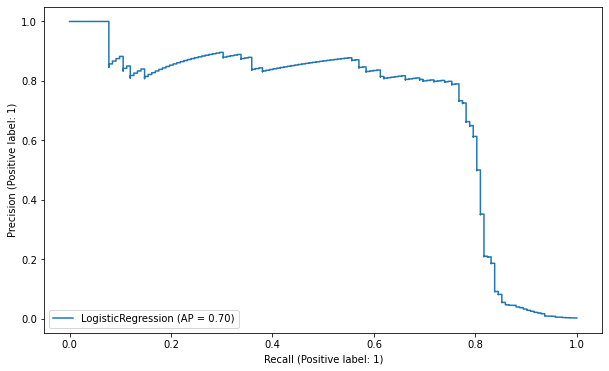

In [49]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test)

In [50]:
log_model_recall = recall_score(y_test, y_pred)

In [51]:
log_model_recall

0.45774647887323944


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


***v. Apply and Plot StratifiedKFold***

In [52]:
from sklearn.model_selection import cross_validate

In [53]:
model = LogisticRegression()

In [54]:
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)

In [55]:
df_scores = pd.DataFrame(scores, index = range(1, 11))

In [56]:
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.717439,0.009242,0.842105,0.484848,0.615385,0.998993
2,1.068551,0.010182,0.840000,0.636364,0.724138,0.999194
3,0.435640,0.010085,0.777778,0.424242,0.549020,0.998842
4,0.888849,0.009314,0.928571,0.393939,0.553191,0.998943
5,0.712945,0.009803,0.850000,0.515152,0.641509,0.999043
6,0.705277,0.009412,0.809524,0.515152,0.629630,0.998993
7,0.862879,0.009456,0.904762,0.575758,0.703704,0.999194
8,0.839721,0.009394,0.833333,0.588235,0.689655,0.999094
9,0.761700,0.010122,0.823529,0.424242,0.560000,0.998892
10,1.030043,0.014181,0.950000,0.575758,0.716981,0.999245


In [57]:
df_scores.mean()

fit_time          0.802304
score_time        0.010119
test_precision    0.855960
test_recall       0.513369
test_f1           0.638321
test_accuracy     0.999043
dtype: float64

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

In [58]:
# pip install imblearn

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
sm = SMOTE(random_state = 2)

In [61]:
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train.ravel())

In [62]:
log_model_smote=LogisticRegression()

In [63]:
log_model_smote.fit(X_train_res, y_train_res.ravel())

LogisticRegression()

In [64]:
y_pred=log_model_smote.predict(X_test_scaled)

In [65]:
eval_metric(log_model_smote, X_train_res, y_train_res, X_test_scaled, y_test)

Test_Set
[[82994  1982]
 [   17   125]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84976
           1       0.06      0.88      0.11       142

    accuracy                           0.98     85118
   macro avg       0.53      0.93      0.55     85118
weighted avg       1.00      0.98      0.99     85118


Train_Set
[[193571   4706]
 [ 15957 182320]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    198277
           1       0.97      0.92      0.95    198277

    accuracy                           0.95    396554
   macro avg       0.95      0.95      0.95    396554
weighted avg       0.95      0.95      0.95    396554



In [66]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,hours_21.0,hours_22.0,hours_23.0,hours_3.0,hours_4.0,hours_5.0,hours_6.0,hours_7.0,hours_8.0,hours_9.0
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0,0,0,0,0,0,0,0,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0,0,0,0,0,0,0,0,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0,0,0,0,0,0,0,0,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0,0,0,0,0,0,0,0,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0,0,0,0,0,0,0,0,0,0


In [67]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

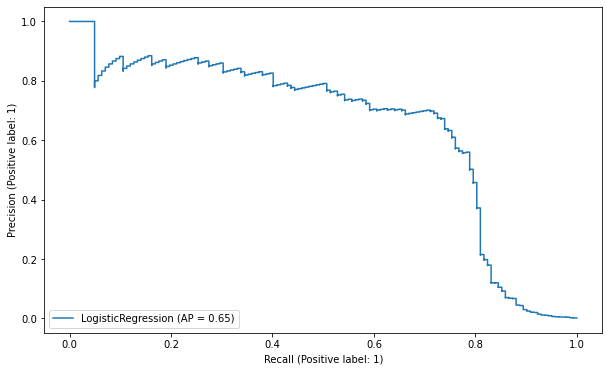

In [68]:
plot_precision_recall_curve(log_model_smote, X_test_scaled, y_test)

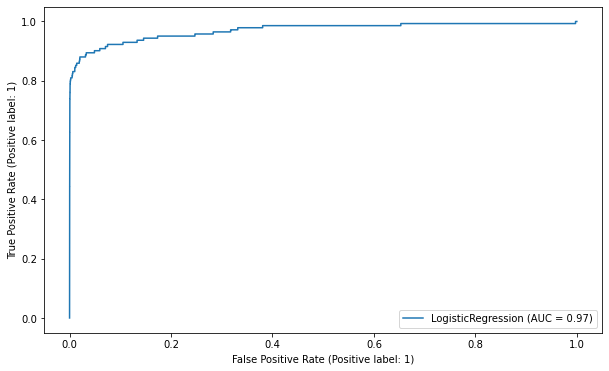

In [69]:
plot_roc_curve(log_model_smote, X_test_scaled, y_test)

In [70]:
y_pred_smote = log_model_smote.predict(X_test_scaled)

### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf_model = RandomForestClassifier(random_state=101)

In [73]:
rf_model.fit(X_train_res,y_train_res)

RandomForestClassifier(random_state=101)

In [74]:
y_pred = rf_model.predict(X_test_scaled)

In [75]:
eval_metric(rf_model, X_train_res, y_train_res, X_test_scaled, y_test)

Test_Set
[[84961    15]
 [   29   113]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.88      0.80      0.84       142

    accuracy                           1.00     85118
   macro avg       0.94      0.90      0.92     85118
weighted avg       1.00      1.00      1.00     85118


Train_Set
[[198277      0]
 [     0 198277]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198277
           1       1.00      1.00      1.00    198277

    accuracy                           1.00    396554
   macro avg       1.00      1.00      1.00    396554
weighted avg       1.00      1.00      1.00    396554



In [76]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
V14,0.169664
V10,0.140250
V12,0.125132
V4,0.096748
V11,0.091812
V17,0.068229
V16,0.045248
V3,0.039357
V7,0.024673
V2,0.022039


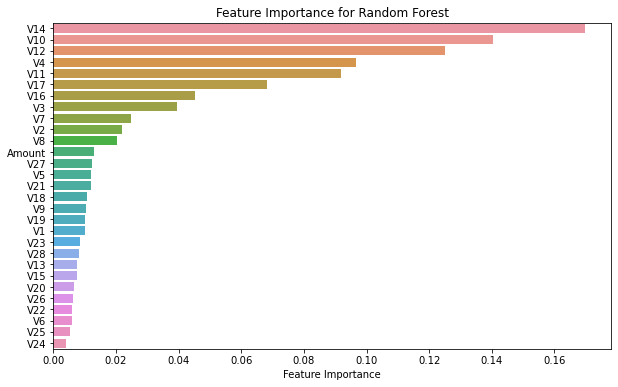

In [77]:
x = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance for Random Forest")
plt.show()

***ii. Prediction and Model Evaluating***

***iii. Plot Precision and Recall Curve***


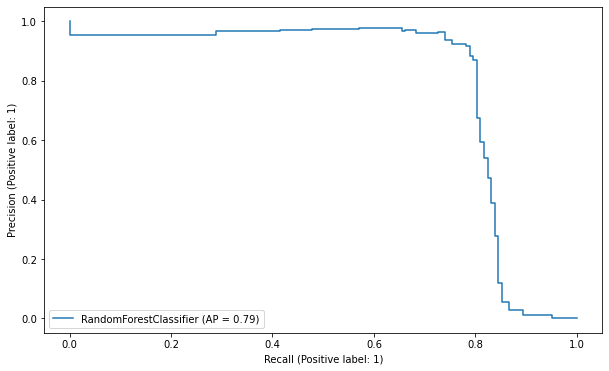

In [78]:
plot_precision_recall_curve(rf_model, X_test_scaled, y_test)

***iv. Apply and Plot StratifiedKFold***

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [79]:
import tensorflow as tf

Init Plugin
Init Graph Optimizer
Init Kernel


In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras import metrics

In [81]:
# Model with the SMOTE applied data
model = Sequential([Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1, activation = "sigmoid")])

Metal device set to: Apple M1


2022-04-23 12:06:14.088418: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-23 12:06:14.088508: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [82]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [83]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

***ii. Define Model***

In [84]:
#X_train = np.asarray(X_train).astype(np.float32)
#y_train = np.asarray(y_train).astype(np.float32)

***iii. Compile Model***

In [85]:
from tensorflow.keras.callbacks import EarlyStopping

In [86]:
early_stop = EarlyStopping(monitor = "recall", mode = "auto", verbose = 1, patience = 5)

In [88]:
model.fit(x = X_train_res, y = y_train_res, validation_split = 0.1, batch_size = 128, epochs = 10, verbose = 1,
          callbacks = [early_stop])

Epoch 1/10
2789/2789 [==============================] - 24s 9ms/step - loss: 0.1342 - recall: 0.9080 - val_loss: 0.2340 - val_recall: 0.8972
Epoch 2/10
2789/2789 [==============================] - 24s 9ms/step - loss: 0.1332 - recall: 0.9091 - val_loss: 0.2276 - val_recall: 0.8984
Epoch 3/10
2789/2789 [==============================] - 25s 9ms/step - loss: 0.1326 - recall: 0.9095 - val_loss: 0.1484 - val_recall: 0.9177
Epoch 4/10
2789/2789 [==============================] - 24s 9ms/step - loss: 0.1319 - recall: 0.9101 - val_loss: 0.2397 - val_recall: 0.8968
Epoch 5/10
2789/2789 [==============================] - 25s 9ms/step - loss: 0.1316 - recall: 0.9107 - val_loss: 0.2008 - val_recall: 0.9021
Epoch 6/10
2789/2789 [==============================] - 23s 8ms/step - loss: 0.1311 - recall: 0.9105 - val_loss: 0.2420 - val_recall: 0.8961
Epoch 00006: early stopping


<AxesSubplot:>

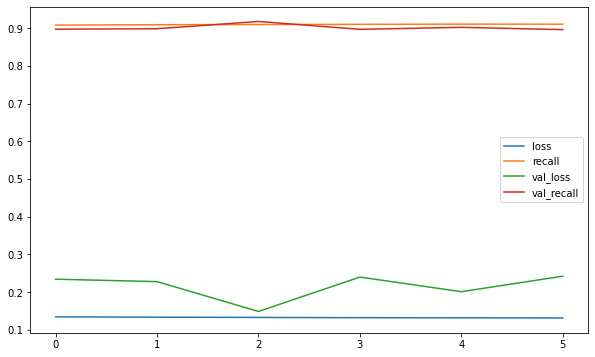

In [89]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [90]:
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [91]:
y_pr = model.predict(X_test)
y_pred = []
for i in y_pr:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

2022-04-23 12:10:19.325062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [92]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  784 84192]
 [    8   134]]
              precision    recall  f1-score   support

         0.0       0.99      0.01      0.02     84976
         1.0       0.00      0.94      0.00       142

    accuracy                           0.01     85118
   macro avg       0.50      0.48      0.01     85118
weighted avg       0.99      0.01      0.02     85118



In [93]:
# Model with unscaled data
model2 = Sequential([Dense(units = 16, activation = "relu", input_dim=X_train.shape[1]),
                    Dense(units = 16, activation = "relu"),
                    Dense(units = 8, activation = "relu"),
                    Dense(units = 1, activation = "sigmoid")])

In [94]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['Recall'])

In [95]:
early_stop = EarlyStopping(monitor = "recall", mode = "auto", verbose = 1, patience = 5)

In [96]:
model2.fit(x = X_train, y = y_train, validation_split = 0.25, batch_size = 128, epochs = 20, verbose = 1,
          callbacks = [early_stop])

Epoch 1/20
  10/1164 [..............................] - ETA: 6s - loss: 0.4045 - recall: 0.0000e+00  

2022-04-23 12:10:22.357742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1164/1164 [==============================] - ETA: 0s - loss: 0.0301 - recall: 0.4143

2022-04-23 12:10:29.445019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1164/1164 [==============================] - 8s 7ms/step - loss: 0.0301 - recall: 0.4143 - val_loss: 0.0052 - val_recall: 0.6500
Epoch 2/20
1164/1164 [==============================] - 9s 7ms/step - loss: 0.0090 - recall: 0.6932 - val_loss: 0.0065 - val_recall: 0.5625
Epoch 3/20
1164/1164 [==============================] - 8s 7ms/step - loss: 0.0062 - recall: 0.7211 - val_loss: 0.0039 - val_recall: 0.7375
Epoch 4/20
1164/1164 [==============================] - 8s 7ms/step - loss: 0.0047 - recall: 0.7092 - val_loss: 0.0037 - val_recall: 0.7250
Epoch 5/20
1164/1164 [==============================] - 9s 7ms/step - loss: 0.0043 - recall: 0.7291 - val_loss: 0.0039 - val_recall: 0.7625
Epoch 6/20
1164/1164 [==============================] - 8s 7ms/step - loss: 0.0041 - recall: 0.7251 - val_loss: 0.0050 - val_recall: 0.6750
Epoch 00006: early stopping


<AxesSubplot:>

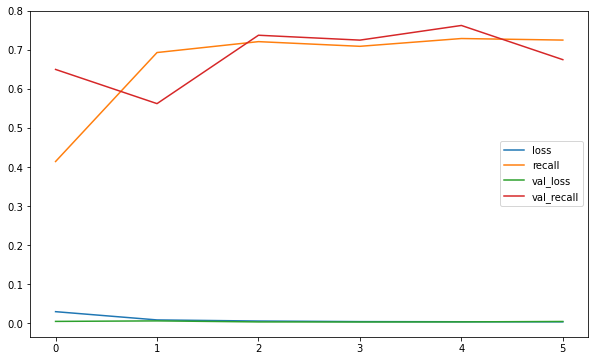

In [97]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.plot()

In [98]:
y_pr = model2.predict(X_test)
y_pred = []
for i in y_pr:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

2022-04-23 12:11:12.978312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [99]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[84965    11]
 [   47    95]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     84976
         1.0       0.90      0.67      0.77       142

    accuracy                           1.00     85118
   macro avg       0.95      0.83      0.88     85118
weighted avg       1.00      1.00      1.00     85118



In [100]:
# Model 3 with scaled data
model3 = Sequential([Dense(units = 8, activation = "relu", input_dim=X_train.shape[1]),
                    Dense(units = 8, activation = "relu"),
                    Dense(units = 8, activation = "relu"),
                    Dense(units = 1, activation = "sigmoid")])

In [101]:
model3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['Recall'])

In [102]:
early_stop = EarlyStopping(monitor = "recall", mode = "auto", verbose = 1, patience = 5)

In [104]:
model3.fit(x = X_train_scaled, y = y_train, validation_split = 0.25, batch_size = 64, epochs = 20, verbose = 1,
          callbacks = [early_stop])

Epoch 1/20
   8/2328 [..............................] - ETA: 18s - loss: 0.6980 - recall: 0.0000e+00 

2022-04-23 12:12:21.247179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2328/2328 [==============================] - ETA: 0s - loss: 0.0290 - recall: 0.0000e+00

2022-04-23 12:12:36.836323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2328/2328 [==============================] - 18s 8ms/step - loss: 0.0290 - recall: 0.0000e+00 - val_loss: 0.0104 - val_recall: 0.0000e+00
Epoch 2/20
2328/2328 [==============================] - 19s 8ms/step - loss: 0.0079 - recall: 0.1155 - val_loss: 0.0049 - val_recall: 0.3750
Epoch 3/20
2328/2328 [==============================] - 19s 8ms/step - loss: 0.0043 - recall: 0.5378 - val_loss: 0.0043 - val_recall: 0.5500
Epoch 4/20
2328/2328 [==============================] - 19s 8ms/step - loss: 0.0038 - recall: 0.6773 - val_loss: 0.0044 - val_recall: 0.5750
Epoch 5/20
2328/2328 [==============================] - 19s 8ms/step - loss: 0.0036 - recall: 0.7291 - val_loss: 0.0036 - val_recall: 0.7375
Epoch 6/20
2328/2328 [==============================] - 17s 7ms/step - loss: 0.0034 - recall: 0.7251 - val_loss: 0.0035 - val_recall: 0.7500
Epoch 00006: early stopping


<AxesSubplot:>

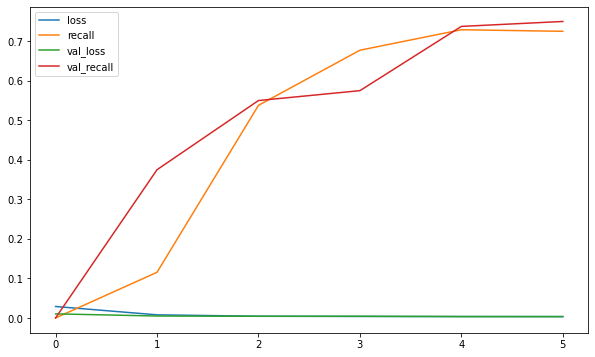

In [105]:
loss_df = pd.DataFrame(model3.history.history)
loss_df.plot()

In [106]:
y_pr = model3.predict(X_test_scaled)
y_pred = []
for i in y_pr:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


2022-04-23 12:14:12.422734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [107]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[84961    15]
 [   36   106]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     84976
         1.0       0.88      0.75      0.81       142

    accuracy                           1.00     85118
   macro avg       0.94      0.87      0.90     85118
weighted avg       1.00      1.00      1.00     85118



***iv. Fit Model***

In [108]:
# Dropout

from tensorflow.keras.layers import Dropout

In [109]:
# Model 4 with droput
model4 = Sequential()


model4.add(Dense(units = 8, activation = "relu", input_dim=X_train.shape[1]))
model4.add(Dropout(0.1))
model4.add(Dense(units = 8, activation = "relu"))
model4.add(Dropout(0.1))         
model4.add(Dense(units = 8, activation = "relu"))
model4.add(Dropout(0.1))
model4.add(Dense(units = 1, activation = "sigmoid"))

model4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['Recall'])

In [110]:
early_stop = EarlyStopping(monitor = "recall", mode = "auto", verbose = 1, patience = 10)

In [111]:
model3.fit(x = X_train_scaled, y = y_train, validation_split = 0.25, batch_size = 64, epochs = 20, verbose = 1,
          callbacks = [early_stop])

Epoch 1/20
2328/2328 [==============================] - 17s 7ms/step - loss: 0.0033 - recall: 0.7610 - val_loss: 0.0034 - val_recall: 0.7375
Epoch 2/20
2328/2328 [==============================] - 17s 7ms/step - loss: 0.0033 - recall: 0.7649 - val_loss: 0.0036 - val_recall: 0.7250
Epoch 3/20
2328/2328 [==============================] - 17s 7ms/step - loss: 0.0032 - recall: 0.7649 - val_loss: 0.0035 - val_recall: 0.7250
Epoch 4/20
2328/2328 [==============================] - 16s 7ms/step - loss: 0.0032 - recall: 0.7888 - val_loss: 0.0037 - val_recall: 0.7250
Epoch 5/20
2328/2328 [==============================] - 16s 7ms/step - loss: 0.0032 - recall: 0.7649 - val_loss: 0.0036 - val_recall: 0.7250
Epoch 6/20
2328/2328 [==============================] - 16s 7ms/step - loss: 0.0032 - recall: 0.7849 - val_loss: 0.0035 - val_recall: 0.7375
Epoch 7/20
2328/2328 [==============================] - 16s 7ms/step - loss: 0.0032 - recall: 0.7888 - val_loss: 0.0034 - val_recall: 0.7250
Epoch 8/20
23

In [113]:
y_pr = model4.predict(X_test_scaled)

2022-04-23 12:17:48.835283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [114]:
y_pred = []
for i in y_pr:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [115]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   83 84893]
 [   68    74]]
              precision    recall  f1-score   support

         0.0       0.55      0.00      0.00     84976
         1.0       0.00      0.52      0.00       142

    accuracy                           0.00     85118
   macro avg       0.28      0.26      0.00     85118
weighted avg       0.55      0.00      0.00     85118



***vi. Plot Precision and Recall Curve***

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to *Pycharm* and create your web app with Flask API.

### Save and Export the Model as .pkl


In [116]:
import pickle

In [117]:
model3.save('fraud_detection_Group8.h5') 

### Save and Export Variables as .pkl

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___